# Feature Scaling

## Normalization 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Desktop\Anamika\ML0to1\Datasets\wine_data.csv" ,header = None, usecols = [0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic Acid']


In [10]:
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


## MinMaxScaling
- When you know the min and max of the dataset.

<Axes: xlabel='Alcohol', ylabel='Density'>

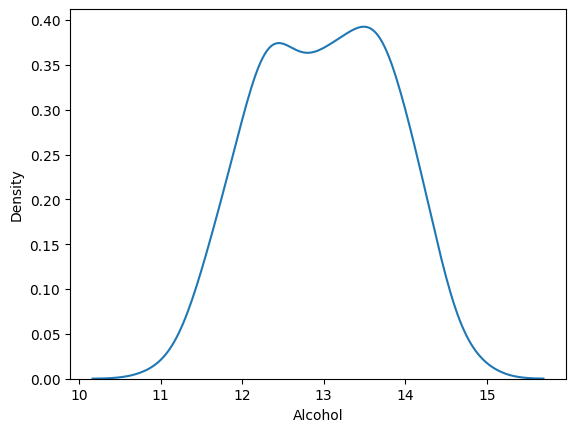

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

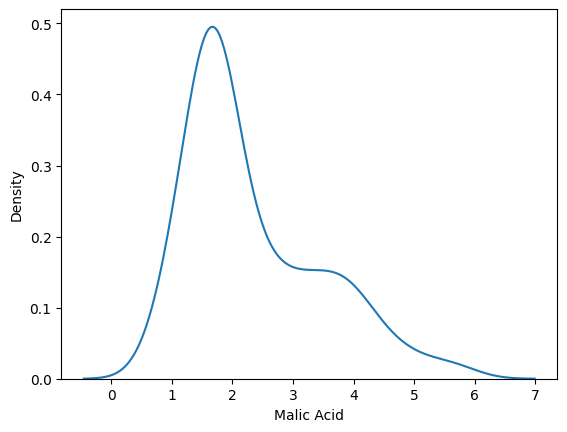

In [13]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

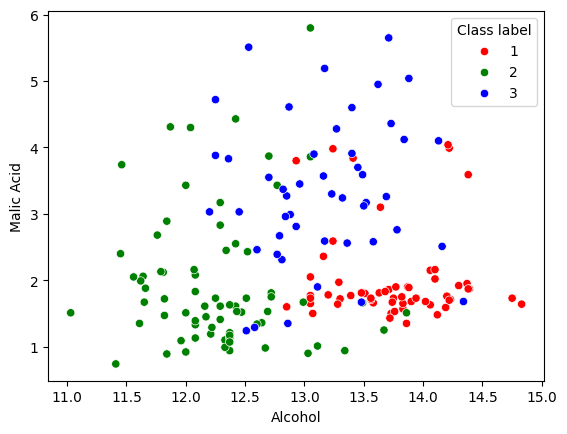

In [19]:
color_dict = {1: "red", 2:"green", 3:"blue"}
sns.scatterplot(x = df['Alcohol'], y = df['Malic Acid'] , hue = df['Class label'], palette = color_dict)

In [24]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(df.drop('Class label', axis = 1), df['Class label'], test_size = 0.3 , random_state = 0)
X_train.shape, X_test.shape


((124, 2), (54, 2))

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)
X_test_scaled 

,Alcohol,Malic Acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513
5,0.142473,0.243697
6,0.814516,0.264706
7,0.357527,0.617647
8,0.327957,0.176471
9,0.282258,0.197479


In [32]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


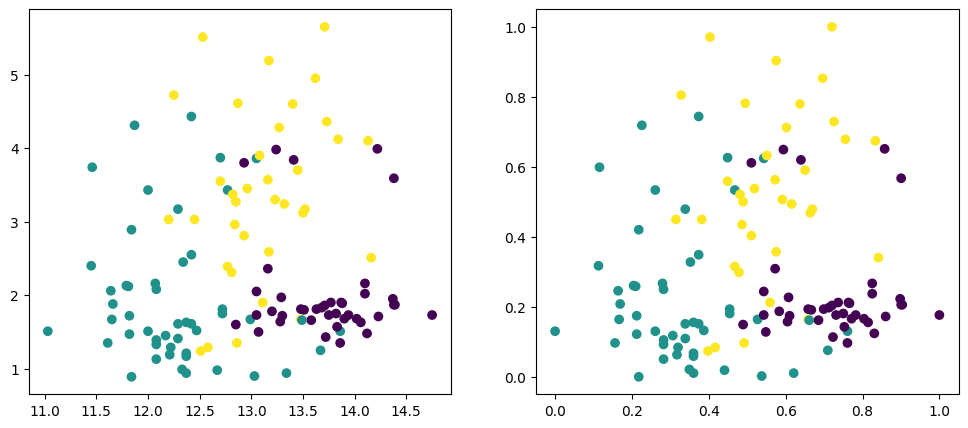

In [34]:
fig ,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c = y_train)
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c= y_train)
plt.show()

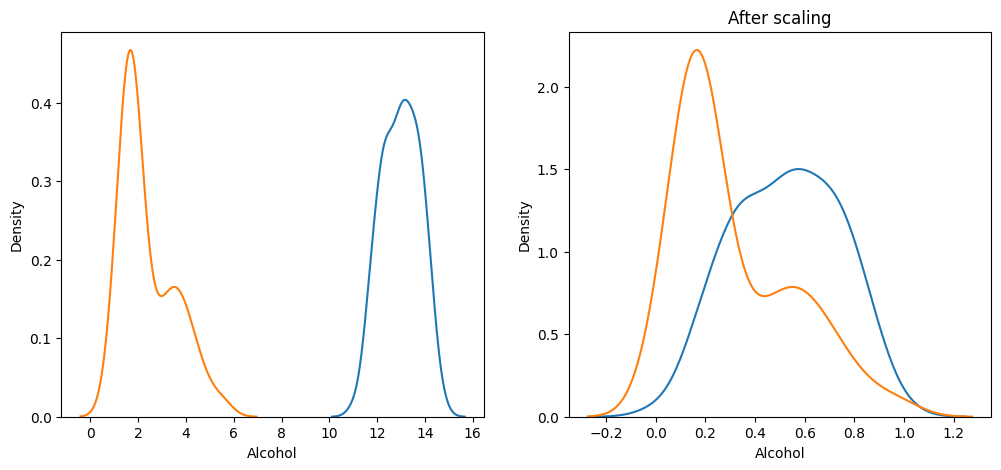

In [39]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
plt.title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)
plt.title("After scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)
plt.show()